# Componentes Conectados


Existem duas funções no OpenCV que podem ser usadas para localizar componentes conectados: **cv2.connectedComponents** e **cv2.connectedComponentsWithStats**. Ambos usam os mesmos argumentos: a imagem binária cujos componentes devem ser encontrados, o tipo de conectividade e a profundidade da imagem de saída

**cv2.connectedComponents** é mais simples e retorna uma tupla de números de componentes e uma imagem com rótulos para componentes (labelmap). 
Além das saídas da função anterior, **cv2.connectedComponentsWithStats** também retorna **estatísticas** sobre cada componente e as **localizações dos centróides dos componentes**.


### Função cv2.connectedComponentsWithStats


`img_output = cv2.connectedComponentsWithStats(src, connectivity, dtype)`

* src = Imagem Original Binarizada
* connectivity = Conectividade dos Pixels (4 ou 8)
* dtype = tipo de componentes 
    - **CV_8U**: 1-byte unsigned integer (unsigned char).
    - **CV_32S**: 4-byte signed integer (int).
    - **CV_32F**: 4-byte floating point (float)
 
Essa função irá retornar o **número de labels (objetos) detectados**, suas respectivas **Labels**, os pontos onde se encontra o objeto **(X, Y, H, W e Área)** e por fim o **centroide** do objeto detectado.


In [1]:
#Bibliotecas
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

#Endereco das imagens
img_names = glob(os.path.join(os.getcwd(), 'images_componentes_conectados', '*.jpg'))
font = cv2.FONT_HERSHEY_SIMPLEX

In [2]:
print(f'Imagens a serem analisadas: {img_names}')

Imagens a serem analisadas: ['C:\\Users\\leand\\Desktop\\Estudos\\OpenCV\\Jupyter\\Arquivos\\8 - Segmentacao de objetos\\images_componentes_conectados\\img01.jpg', 'C:\\Users\\leand\\Desktop\\Estudos\\OpenCV\\Jupyter\\Arquivos\\8 - Segmentacao de objetos\\images_componentes_conectados\\img02.jpg', 'C:\\Users\\leand\\Desktop\\Estudos\\OpenCV\\Jupyter\\Arquivos\\8 - Segmentacao de objetos\\images_componentes_conectados\\img03.jpg', 'C:\\Users\\leand\\Desktop\\Estudos\\OpenCV\\Jupyter\\Arquivos\\8 - Segmentacao de objetos\\images_componentes_conectados\\img04.JPG', 'C:\\Users\\leand\\Desktop\\Estudos\\OpenCV\\Jupyter\\Arquivos\\8 - Segmentacao de objetos\\images_componentes_conectados\\img05.jpg', 'C:\\Users\\leand\\Desktop\\Estudos\\OpenCV\\Jupyter\\Arquivos\\8 - Segmentacao de objetos\\images_componentes_conectados\\img06.jpg', 'C:\\Users\\leand\\Desktop\\Estudos\\OpenCV\\Jupyter\\Arquivos\\8 - Segmentacao de objetos\\images_componentes_conectados\\img07.jpg', 'C:\\Users\\leand\\Desktop

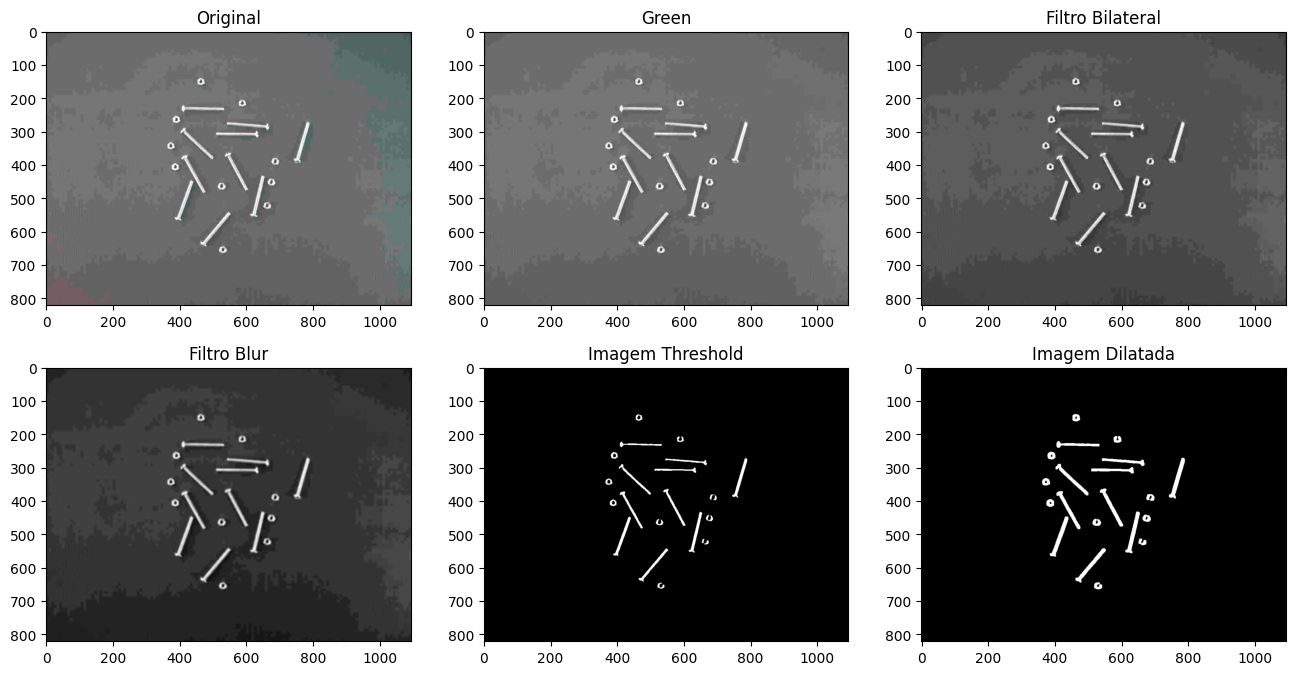

In [3]:
#Ler todas as imagens na pasta e plotar
for fn in img_names:

    areas = list()

    # Imagem de entrada
    img = cv2.imread(fn, 1)

    # Separar os canais da imagens
    B, G, R = cv2.split(img)

    # Filtro bilateral e Blur - Reducao de ruidos e melhora de bordas
    img_bil = cv2.bilateralFilter(G, 1, 90, 90)
    img_blur = cv2.blur(img_bil, (5,5))

    # Converter todos os pixels entre 1-195 para 0 e os outros para 1
    img_th = cv2.threshold(img_blur, 190, 255, cv2.THRESH_BINARY)[1]

    # Dilatar as imagens
    img_dilate = cv2.dilate(img_th, np.ones((4,4),np.uint8),
        iterations = 1)
    
plt.figure(figsize=(16,8))    
plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original')

plt.subplot(2,3,2),plt.imshow(G,cmap = 'gray')
plt.title('Green')

plt.subplot(2,3,3),plt.imshow(img_bil,cmap = 'gray')
plt.title('Filtro Bilateral')

plt.subplot(2,3,4),plt.imshow(img_blur,cmap = 'gray')
plt.title('Filtro Blur')

plt.subplot(2,3,5),plt.imshow(img_th,cmap = 'gray')
plt.title('Imagem Threshold')

plt.subplot(2,3,6),plt.imshow(img_dilate,cmap = 'gray')
plt.title('Imagem Dilatada')

plt.show()

   

Conjunto Aprovado


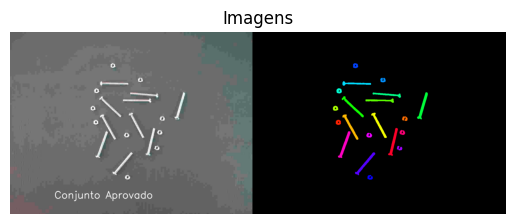

In [4]:
# Aplicar connectedComponents para detetctar pixels conectados
numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_dilate, 4, cv2.CV_8U)

areas.append(stats)
df_areas = pd.DataFrame(areas[0], columns=['X', 'Y', 'W', 'H', 'AREA'])
df_areas.drop(df_areas.index[0], inplace=True)
parafusos = df_areas[df_areas['AREA'] > 900]
porcas = df_areas[df_areas['AREA'] < 899]
    
# Mapeie rótulos de componentes para valor de matiz, 0-179 é o intervalo de matiz no OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    
# Convertet HSV->BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    
# BG preto
labeled_img[label_hue == 0] = 0
    
qntd_elem = numLabels - 1
    
flag = True

if (len(parafusos) != 10) :
    print(f'Falta {abs(len(parafusos) - 10)} parafusos')
    cv2.putText(img, f'Falta {abs(len(parafusos) - 10)} parafusos',(50, 50), font, 1.5,(255,255,255),2,cv2.LINE_AA)
    flag = False        
        

if (len(porcas) != 10) :
    print(f'Falta {abs(len(porcas) - 10)} porcas')
    cv2.putText(img, f'Falta {abs(len(porcas) - 10)} porcas',(50, 750), font, 1.5,(255,255,255),2,cv2.LINE_AA)
    flag = False        
        
if flag == True:
    print('Conjunto Aprovado')
    cv2.putText(img, 'Conjunto Aprovado',(200, 750), font, 1.5,(255,255,255),2,cv2.LINE_AA) 
        
        

img_concate = cv2.hconcat([cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)])
img_text = np.zeros((img_concate.shape[0], 50), dtype=np.uint8)
imagem_total = cv2.hconcat([cv2.cvtColor(img_concate, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)])
plt.imshow(imagem_total)
plt.axis('off')
plt.title("Imagens")
plt.show()



In [5]:
len(parafusos)

10